In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [ ]:
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('AAPL')
df=data
df.head(20)


[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.402172,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.714725,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.716953,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.049519,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,24.973558,237458000
5,2015-01-09,28.167500,28.312500,27.552500,28.002501,25.000334,214798000
6,2015-01-12,28.150000,28.157499,27.200001,27.312500,24.384312,198603200
7,2015-01-13,27.857500,28.200001,27.227501,27.555000,24.600817,268367600
8,2015-01-14,27.260000,27.622499,27.125000,27.450001,24.507072,195826400
9,2015-01-15,27.500000,27.514999,26.665001,26.705000,23.841951,240056000


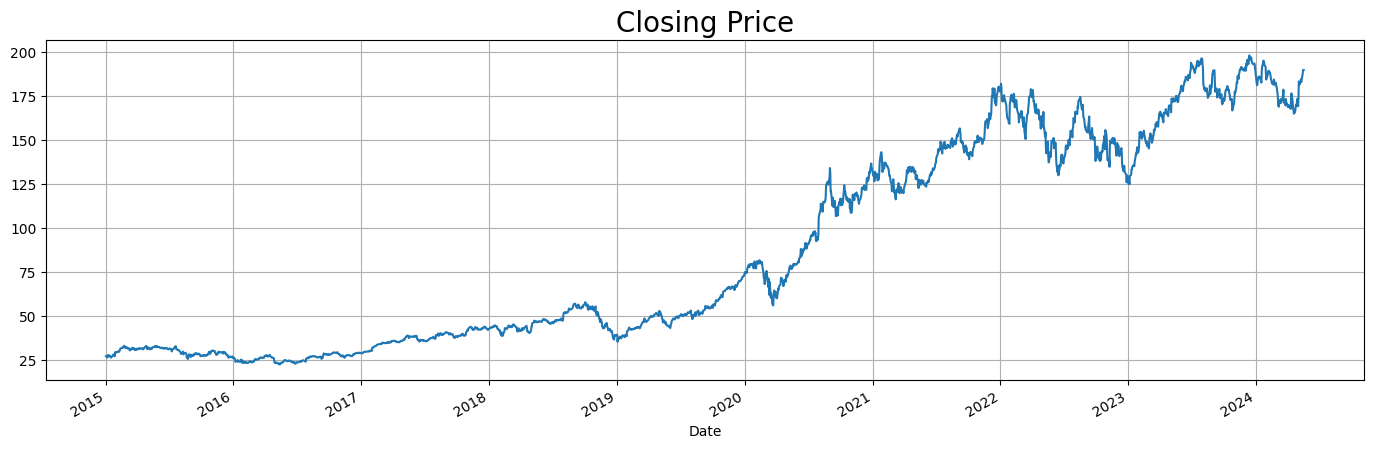

In [ ]:
# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')
df.index = df['Date']

#plot
plt.figure(figsize=(17,5))
df.Close.plot()
plt.title("Closing Price", fontsize=20)
plt.grid(True)
plt.show()

In [ ]:
print('Min: ', df.index.min())
print('Max: ', df.index.max())

Min:  2015-01-02 00:00:00
Max:  2024-05-17 00:00:00


In [ ]:
df.shape

(2360, 7)

# Splitting into Training and Validation Sets

In [ ]:

from sklearn.model_selection import train_test_split

# Sorting the data by index
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])

# Populating the new DataFrame
new_data['Date'] = data['Date'].values
new_data['Close'] = data['Close'].values

# Splitting into train and validation using train_test_split with shuffle=False
train_size = 0.8
train, valid = train_test_split(new_data, train_size=train_size, shuffle=False)

# Displaying the results
print("Train set:")
print(train)
print("Validation set:")
print(valid)


Train set:
           Date       Close
0    2015-01-02   27.332500
1    2015-01-05   26.562500
2    2015-01-06   26.565001
3    2015-01-07   26.937500
4    2015-01-08   27.972500
...         ...         ...
1883 2022-06-27  141.660004
1884 2022-06-28  137.440002
1885 2022-06-29  139.229996
1886 2022-06-30  136.720001
1887 2022-07-01  138.929993

[1888 rows x 2 columns]
Validation set:
           Date       Close
1888 2022-07-05  141.559998
1889 2022-07-06  142.919998
1890 2022-07-07  146.350006
1891 2022-07-08  147.039993
1892 2022-07-11  144.869995
...         ...         ...
2355 2024-05-13  186.279999
2356 2024-05-14  187.429993
2357 2024-05-15  189.720001
2358 2024-05-16  189.839996
2359 2024-05-17  189.869995

[472 rows x 2 columns]


In [ ]:
# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of training set:
(1888, 2)

 Shape of validation set:
(472, 2)


# Average

In [ ]:
from sklearn.metrics import mean_squared_error

# Initialize an empty list for predictions
preds = []

# Loop through the validation set
for i in range(0, valid.shape[0]):
    # Calculate the sum of the last 'valid.shape[0] - i' values from the training set
    a = np.sum(train['Close'][len(train) - valid.shape[0] + i:]) + np.sum(preds)
    # Calculate the average
    b = a / valid.shape[0]
    # Append the prediction
    preds.append(b)

# Convert the predictions to a NumPy array
preds = np.array(preds)

# Calculate the RMSE using scikit-learn's mean_squared_error
rms = np.sqrt(mean_squared_error(valid['Close'].values, preds))

# Print the RMSE value
print('\nRMSE value on validation set:')
print(rms)



RMSE value on validation set:
24.870754203238874


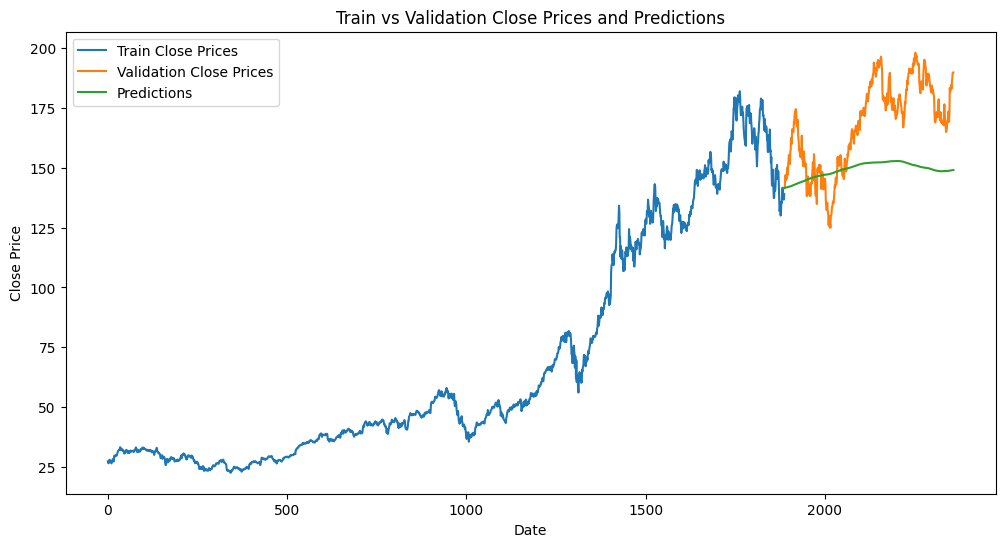

In [ ]:
# Adding the predictions to the validation DataFrame
valid['Predictions'] = preds

# Plotting the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Train Close Prices')
plt.plot(valid['Close'], label='Validation Close Prices')
plt.plot(valid['Predictions'], label='Predictions')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Train vs Validation Close Prices and Predictions')
plt.show()


# Linear Regression

In [ ]:
# Converting 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Setting 'Date' column as the index
df.set_index('Date', inplace=True)

# Sorting the DataFrame by index (date)
data = df.sort_index(ascending=True)

# Creating a new DataFrame with 'Date' and 'Close' columns
new_data = data[['Close']].reset_index()

# Display the first few rows to verify
print(new_data.head())


        Date      Close
0 2015-01-02  27.332500
1 2015-01-05  26.562500
2 2015-01-06  26.565001
3 2015-01-07  26.937500
4 2015-01-08  27.972500


In [ ]:

# Convert 'Date' column to datetime only if it's not already in datetime format
if not pd.api.types.is_datetime64_any_dtype(new_data['Date']):
    new_data['Date'] = pd.to_datetime(new_data['Date'])

# Extract date-related features using vectorized operations
new_data['Year'] = new_data['Date'].dt.year
new_data['Month'] = new_data['Date'].dt.month
new_data['Week'] = new_data['Date'].dt.isocalendar().week
new_data['Day'] = new_data['Date'].dt.day
new_data['Dayofweek'] = new_data['Date'].dt.dayofweek
new_data['Dayofyear'] = new_data['Date'].dt.dayofyear
new_data['Is_month_end'] = new_data['Date'].dt.is_month_end.astype(int)
new_data['Is_month_start'] = new_data['Date'].dt.is_month_start.astype(int)
new_data['Is_quarter_end'] = new_data['Date'].dt.is_quarter_end.astype(int)
new_data['Is_quarter_start'] = new_data['Date'].dt.is_quarter_start.astype(int)
new_data['Is_year_end'] = new_data['Date'].dt.is_year_end.astype(int)
new_data['Is_year_start'] = new_data['Date'].dt.is_year_start.astype(int)

# Drop the 'Date' column as it's no longer needed
new_data.drop('Date', axis=1, inplace=True)

# Creating a new column named 'mon_fri' and setting it based on 'Dayofweek'
new_data['mon_fri'] = new_data['Dayofweek'].apply(lambda x: 1 if x == 0 or x == 4 else 0)

# Print the head of the DataFrame to verify changes
print(new_data.head())


       Close  Year  Month  Week  Day  Dayofweek  Dayofyear  Is_month_end  \
0  27.332500  2015      1     1    2          4          2             0   
1  26.562500  2015      1     2    5          0          5             0   
2  26.565001  2015      1     2    6          1          6             0   
3  26.937500  2015      1     2    7          2          7             0   
4  27.972500  2015      1     2    8          3          8             0   

   Is_month_start  Is_quarter_end  Is_quarter_start  Is_year_end  \
0               0               0                 0            0   
1               0               0                 0            0   
2               0               0                 0            0   
3               0               0                 0            0   
4               0               0                 0            0   

   Is_year_start  mon_fri  
0              0        1  
1              0        1  
2              0        0  
3              0      

# Splitting into Training And Validation Sets


In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and validation sets
train, valid = train_test_split(new_data, test_size=0.2, shuffle=False)

# Separate features and target variables
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

# Print the shapes to verify
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_valid shape: {x_valid.shape}")
print(f"y_valid shape: {y_valid.shape}")


x_train shape: (1888, 13)
y_train shape: (1888,)
x_valid shape: (472, 13)
y_valid shape: (472,)


# Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

# Make predictions
preds = model.predict(x_valid)

# Calculate RMSE using scikit-learn's mean_squared_error
rms = np.sqrt(mean_squared_error(y_valid, preds))

# Print RMSE
print(rms)


17.095472049015967


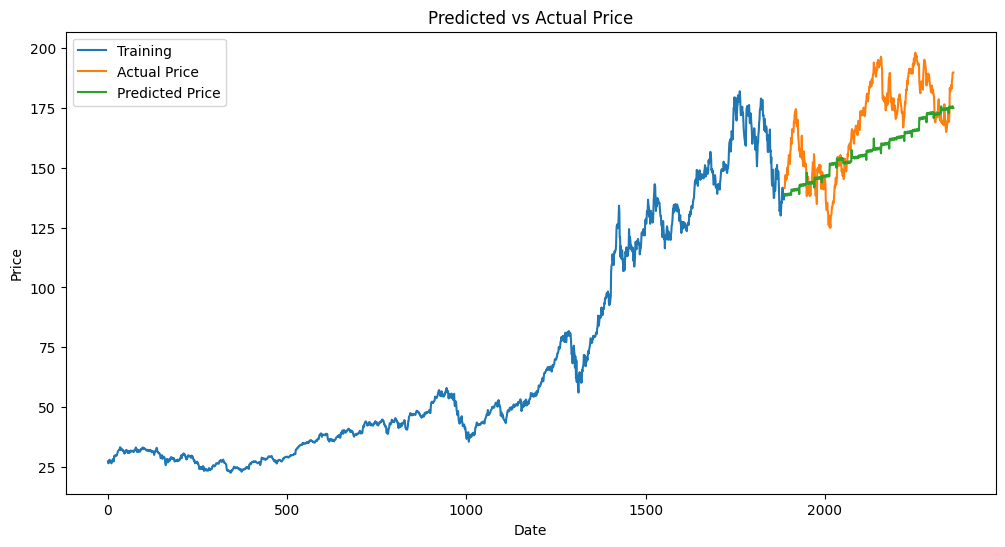

In [ ]:
# Set the predictions to the 'Predictions' column in the valid DataFrame
valid['Predictions'] = preds

# Set the index of valid and train DataFrames
valid.index = new_data[train.shape[0]:].index
train.index = new_data[:train.shape[0]].index

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Training')
plt.plot(valid['Close'], label='Actual Price')
plt.plot(valid['Predictions'], label='Predicted Price')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Predicted vs Actual Price')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


# K Nearest Neighbours

In [ ]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Scaling data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)

# Using grid search to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

# Fit the model and make predictions
model.fit(x_train_scaled, y_train)
preds = model.predict(x_valid_scaled)


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_valid, preds))
print(rmse)


28.867233114954058


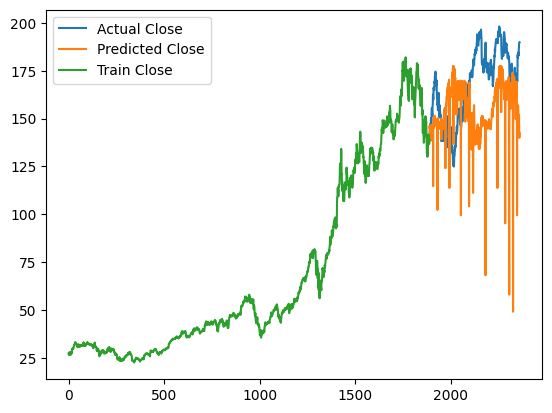

In [ ]:
# Add predictions to the validation data
valid['Predictions'] = preds

# Plot Close prices and predictions
plt.plot(valid['Close'], label='Actual Close')
plt.plot(valid['Predictions'], label='Predicted Close')
plt.plot(train['Close'], label='Train Close')
plt.legend()
plt.show()


# LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import pandas as pd

# Creating DataFrame
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])
new_data['Date'] = df.index
new_data['Close'] = df['Close'].values

# Setting index
new_data.set_index('Date', inplace=True)

# Creating train and test sets
dataset = new_data.values

# Determine the index to split train and validation sets
train_size = int(len(dataset) * 0.8)
train = dataset[:train_size]
valid = dataset[train_size:]

print(len(train))
print(len(valid))


1888
472


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scaling the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Converting dataset into x_train and y_train
x_train, y_train = [], []
for i in range(60, len(train)):
    x_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

# Predicting valid.shape[0] values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)


1828/1828 - 60s - loss: 0.0013 - 60s/epoch - 33ms/step
15/15 [==============================] - 2s 16ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rms = np.sqrt(mean_squared_error(valid, closing_price))
print(rms)


7.350458677964686


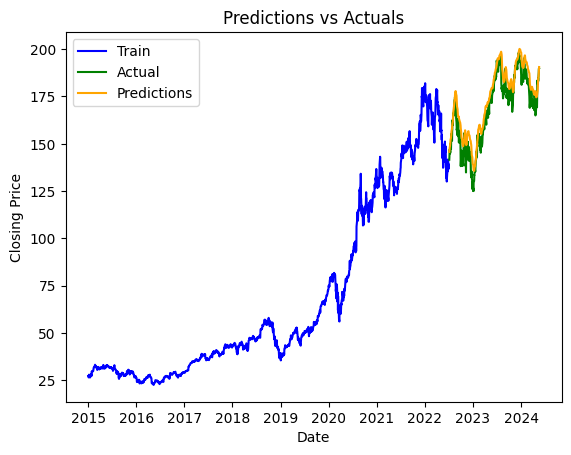

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert train and valid arrays to DataFrames
train_df = pd.DataFrame(train, columns=['Close'], index=new_data.index[:len(train)])
valid_df = pd.DataFrame(valid, columns=['Close'], index=new_data.index[len(train):])

# Plotting the data
plt.plot(train_df.index, train_df['Close'], label='Train', color='blue')
plt.plot(valid_df.index, valid_df['Close'], label='Actual', color='green')
plt.plot(valid_df.index, closing_price, label='Predictions', color='orange')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Predictions vs Actuals')
plt.legend()

# Display the plot
plt.show()
